# Question (a)

In [1]:
!pip install numpy 

In [2]:
!pip install pandas

In [3]:
import numpy as np
import pandas as pd

Import the data sets

In [4]:
train = pd.read_csv("E:/Year 4/ST 4035/Assignment 02_Kaggle/train.csv",low_memory=False)

In [5]:
train.head()

,ID,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final
0,1,2018,11,7,1,2,2,2,53,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2,2018,1,7,1,2,2,1,17,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,2018,5,7,1,2,2,1,47,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,4,2018,1,7,1,2,2,1,21,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,5,2016,8,7,1,2,1,1,99,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [6]:
train.columns

Index(['ID', 'Year', 'Month', 'Hospital', 'Sample', 'ICU', 'OPD', 'Sex', 'Age',
       'Ethnicity',
       ...
       'FU_L.interrogansserovarMankarsostr.Mankarso',
       'FU_L.santarosaiserovarGeorgiastr.LT117',
       'FU_L.santarosaiserovarPyrogenesstr.Salinem',
       'FU_L.interrogansserovarBataviaestr.VanTienan',
       'FU_L.interrogansserovarAlexistr.616',
       'FU_L.interrogansserovarAustralisstr.Ballico',
       'FU_L.interrogansserovarwolfiistr.3705',
       'FU_L.interrogansserovarWeerasinghe', 'FU_Patoc', 'Final'],
      dtype='object', length=806)

In [7]:
[rows,col] = train.shape
print(f"Rows : {rows} \nColumns : {col}")

Rows : 1387 
Columns : 806


### Data pre-processings

Drop "ID" variable, because it won't be important for the analysis with the nature of the study

In [8]:
train = train.drop('ID',axis=1)

Check whether having any missing values

In [9]:
train.isnull().sum()

Year                                              0
Month                                             0
Hospital                                          0
Sample                                            0
ICU                                               0
                                               ... 
FU_L.interrogansserovarAustralisstr.Ballico    1265
FU_L.interrogansserovarwolfiistr.3705          1265
FU_L.interrogansserovarWeerasinghe             1265
FU_Patoc                                       1265
Final                                             0
Length: 805, dtype: int64

Need to consider the '99' as a missing values as it act as a abnormal data in most of the variables

In [10]:
train.replace(['99', 99], np.nan, inplace=True)
train.isnull().sum() 

Year                                              0
Month                                             0
Hospital                                          0
Sample                                            0
ICU                                              83
                                               ... 
FU_L.interrogansserovarAustralisstr.Ballico    1265
FU_L.interrogansserovarwolfiistr.3705          1265
FU_L.interrogansserovarWeerasinghe             1265
FU_Patoc                                       1265
Final                                             0
Length: 805, dtype: int64

Check whether there are any duplicated responses

In [11]:
train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1382    False
1383    False
1384    False
1385    False
1386    False
Length: 1387, dtype: bool

In [12]:
# variable names
train.columns

Index(['Year', 'Month', 'Hospital', 'Sample', 'ICU', 'OPD', 'Sex', 'Age',
       'Ethnicity', 'Income',
       ...
       'FU_L.interrogansserovarMankarsostr.Mankarso',
       'FU_L.santarosaiserovarGeorgiastr.LT117',
       'FU_L.santarosaiserovarPyrogenesstr.Salinem',
       'FU_L.interrogansserovarBataviaestr.VanTienan',
       'FU_L.interrogansserovarAlexistr.616',
       'FU_L.interrogansserovarAustralisstr.Ballico',
       'FU_L.interrogansserovarwolfiistr.3705',
       'FU_L.interrogansserovarWeerasinghe', 'FU_Patoc', 'Final'],
      dtype='object', length=805)

Changing some column names to proceed with further feature engineering processes

In [13]:
col_names = {'Muscletendernessonset': 'Mustenderonset', 'Muscletendernessad':'Mustenderad', 'Vomitingadmission':'Vomitingad','Cnsuffusionad':'Consufad','Cnsuffusiononset':'Consufonset', 
             'Mucosalrashonset':'Mucorashonset','Mucosalrashad':'Mucorashad', 'Diarrhoeaonset':'diarrheaonset','Diarrhoeaad':'diarrheaad', 'OliguriaAd':'Oliguriaad', 'Haemoptasisonset':'Haemoptysisonset',
             'Haemoptasisad':'Haemoptysisad', "SOBadd": 'SOBad','Hepatictendernessad':'hepatictenderad', 'Hepatomegalyad':'hepatomegalyad',
             'Spleenimegalyad':'Spleenomegalyad','SBPadd':'SBPad','DBPadd':'DBPad', 'Lympadenopathyad':'Lymphadenopathyad','PRad':'Pulseratead'}
train.rename(columns = col_names, inplace=True)


### Creating new variables by identifying objective and examine the dataset

Creating some new features for the clinical features given as datewise to make counts of those features 

In [14]:
sympt = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash','Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice',
        'Photophobia','Confusion','Cough','Haemoptysis','SOB','SBP','DBP','Pulserate','Chestpain','Bleeding','hepatictender','hepatomegaly','Spleenomegaly','Lymphadenopathy', 'Neckstiffness']
len(sympt)

for col in sympt:
  df = train[[col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  train[col+'Days'] = df['Days']
  train.drop([col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

Creating some new features combining the the columns related to stream and stagnant watersources seperately

In [15]:
cols_stream = ['HomeStreamrivercanaloranyotherrunningwatersource', 
        'WorkplaceStreamrivercanaloranyotherrunningwatersource']

cols_stagnant =['Homepondlaketankoranyotherstagnantwatersource',
        'WorkPlacepondlaketankoranyotherstagnantwatersource']
       
streamwaterAny = train[cols_stream]
stagnantwaterAny = train[cols_stagnant]

def recode(row):
    if row.isnull().all():
        return np.nan
    elif (row == 1).any():
        return 1
    else:
        return 2

train['streamwaterAny'] = streamwaterAny.apply(recode, axis=1)
train.drop(cols_stream, axis = 1, inplace = True)

train['stagnantwaterAny'] = stagnantwaterAny.apply(recode, axis=1)
train.drop(cols_stagnant, axis = 1, inplace = True)

Creating some new variables combining columns related to domestic(Dog, Cat) and farm(Buffalo, Goat, Pig) animals handling seperately

In [16]:
#combine domestic(Dog, Cat) and farm(Buffalo, Goat, Pig) animals handling columns seperately
cols_farm = ['BuffaloHandle', 'Goathandle', 'Pighandle']

cols_domestic =['Cathandle', 'Doghandle']

handlingfarmanimAny = train[cols_farm]
handlingdomesniAny = train[cols_domestic]

def recode(row):
    if row.isnull().all():
        return np.nan
    elif (row == 1).any():
        return 1
    else:
        return 2

train['handlingfarmanimAny'] = handlingfarmanimAny.apply(recode, axis=1)
train.drop(cols_farm, axis = 1, inplace = True)

train['handlingdomesniAny'] = handlingdomesniAny.apply(recode, axis=1)
train.drop(cols_domestic, axis = 1, inplace = True)

Creating new variables combining the columns related to nearby Environmental factors, seperately as wet, plants, agricultural, farming and disposal

In [17]:

cols_wet = ['Homemarshywetland','Workplacemarshywet']
cols_plants =['HomeBushes','Workplacebushes','Homeforest','Workplaceforest']
cols_agri = ['Homeworkingpaddyfield','WorkPlaceworkingpaddyfield','Homeabondantpaddyfield','Workplaceabondantpaddyfield','Homeotheragricultural','workplaceotheragricultural']
cols_animfarm = ['Homeanimalfarm','Workplaceanimalfarm']
cols_disposals =  ['Homegarbageaccumilation','Workplacegarbageaccumilation','Homeblockeddrainage','Workplaceblockeddrainage','Homesewer', 'Workplacesewer']

nearAnywetlands = train[cols_wet]
nearAnyplants = train[cols_plants]
nearAnyagri = train[cols_agri]
nearAnyanimfarm = train[cols_animfarm]
nearAnydisposals = train[cols_disposals]
def recode(row):
    if row.isnull().all():
        return np.nan
    elif (row == 1).any():
        return 1
    else:
        return 2
train['nearAnywetlands'] = nearAnywetlands.apply(recode, axis=1)
train.drop(cols_wet, axis = 1, inplace = True)

train['nearAnyplants'] = nearAnyplants.apply(recode, axis=1)
train.drop(cols_plants, axis = 1, inplace = True)

train['nearAnyagri'] = nearAnyagri.apply(recode, axis=1)
train.drop(cols_agri, axis = 1, inplace = True)

train['nearAnyanimfarm'] = nearAnyanimfarm.apply(recode, axis=1)
train.drop(cols_animfarm, axis = 1, inplace = True)

train['nearAnydisposals'] = nearAnydisposals.apply(recode, axis=1)
train.drop(cols_disposals, axis = 1, inplace = True)

In [18]:
train.shape # number of variables have reduced

(1387, 506)

Percntages of missing values in each variable

In [19]:

Missing = train.isnull().sum()/len(train)*100
Missing_info = pd.DataFrame({'Variable': Missing.index, 'Missing Percentage': Missing.values})
Missing_info

,Variable,Missing Percentage
0,Year,0.000000
1,Month,0.000000
2,Hospital,0.000000
3,Sample,0.000000
4,ICU,5.984138
...,...,...
501,nearAnywetlands,70.511896
502,nearAnyplants,70.295602
503,nearAnyagri,70.367700
504,nearAnyanimfarm,70.439798


In [20]:
train.columns

Index(['Year', 'Month', 'Hospital', 'Sample', 'ICU', 'OPD', 'Sex', 'Age',
       'Ethnicity', 'Income',
       ...
       'NeckstiffnessDays', 'streamwaterAny', 'stagnantwaterAny',
       'handlingfarmanimAny', 'handlingdomesniAny', 'nearAnywetlands',
       'nearAnyplants', 'nearAnyagri', 'nearAnyanimfarm', 'nearAnydisposals'],
      dtype='object', length=506)

Setting a threshold to drop the variables which have higher number of missing values which leads to imputation is not making sense.

In [21]:
Threshold = 80
ExistingVars = train.columns
variables = []
[rows,col] = train.shape
print(f"Rows : {rows} \nColumns : {col}")
for i in range(col):
    if Missing[i] > Threshold:
        variables.append(ExistingVars[i])

Rows : 1387 
Columns : 506


C:\Users\user\AppData\Local\Temp\ipykernel_13744\3404068.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if Missing[i] > Threshold:


In [22]:
len(variables)

317

Dropping the selected variables which having more than 80% from the dataset

In [23]:
train = train.drop(variables,axis=1)

In [24]:
train.shape

(1387, 189)

In [25]:
# Cast the objects to categorical field
Categorical_vars = ['Year','Month','Hospital','Sample','ICU','OPD','Sex',
                    'Ethnicity','Education','TertiaryEducation','Prophylactics',
                    'Pasttreatments','Pastantibiotics','Chronicillness','Possibleexposure',
                    'Usualdrinkingwatersource','Usualbathingwatersource','Sourceofwaterforhousehold','Garbagedisposalprocedure',
                    'Accumilationofrefusal','Availabilityofpublicgarbagecollectionprocedure',
                    'Rathome','RatWorkplace','RatNeighbourhood','Cathome','Catworkplace','CatNeighbourhood','Doghome','DogWorkplace',
                    'DogNeighbourhood','Cattlehome','CattleWorkplace','CattleNeighbourhood','PigHome','PigWorkplace','PigNeighbourhood','GoatHome',
                    'GoatWorkplace','GoatNeighbourhood','Urumeeyahome','Urumeeyaworkplace','UrimeeyaNeighbourhood','OtherrhodentsHome','Marshlandexposure','Wetsoilexposure',
                    'Floodexposure','Forestexposure','BushesExposure','Otheragriexposure','Gardeningexposure','Otheroutdoorworkexposure','Naturalrunningwaterexposure',
                    'Stagnantwaterexposure','Manmaderunningwaterexposure','Drainsexposure','Otherwaterexposure','Paddyfieldexposure','Walkingbarefootoutdoor',
                    'Feveronset','Headacheonset','Musclepainonset',
                    'Consufonset','Jaundiceonset','Skinrashonset','Oliguriaonset','Anuriaonset','SOBonset','Coughonset','Haemoptysisonset',
                    'Chestpainonset','Nauseaonset','Vomitingonset','diarrheaonset','Bleedingonset','Mucorashonset','Prostrationonset','Rigorsonset',
                    'Photophobiaonset','Chillsonset','Mustenderonset','Psychoticsymptomsonset','Confusiononset','Psychoticsymptomsad','WPqPCRDiagnosis','UrineqPCRDiagnosis',
                    'CultureqPCRDia','SerumqPCRDiagnosis','Isolate','MAT_set_1','Final','streamwaterAny', 'stagnantwaterAny', 'handlingfarmanimAny',
                    'handlingdomesniAny','nearAnywetlands','nearAnyplants','nearAnyagri','nearAnyanimfarm','nearAnydisposals']

train[Categorical_vars] = train[Categorical_vars].astype('category')



In [26]:
train.describe()

,Age,Income,CattleHandle,WBCcount,Ncount,N,Lcount,L,Plateletcount,PCV,...,Acu_L.interrogansserovarIcterohaemorrhagiaestr.RGA,Acu_L.interrogansserovarMankarsostr.Mankarso,Acu_L.santarosaiserovarGeorgiastr.LT117,Acu_L.santarosaiserovarPyrogenesstr.Salinem,Acu_L.interrogansserovarBataviaestr.VanTienan,Acu_L.interrogansserovarAlexistr.616,Acu_L.interrogansserovarAustralisstr.Ballico,Acu_L.interrogansserovarwolfiistr.3705,Acu_L.interrogansserovarWeerasinghe,Acu_Patoc
count,1217.000000,851.000000,421.000000,949.000000,745.000000,745.000000,722.000000,751.000000,750.000000,737.000000,...,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,42.955629,38142.184489,1.957245,8526.303477,6177.920805,70.877998,1475.987535,19.991801,180568.533333,38.913867,...,3.697749,2.090032,8.360129,1.768489,2.411576,2.411576,1.446945,0.643087,4.501608,1.768489
std,14.867828,25581.767906,0.202546,5806.652821,4255.946347,15.826388,1351.930792,14.899621,159572.297410,6.672387,...,13.105969,10.022793,46.429401,9.250515,23.806432,10.730018,8.395251,5.642975,33.297183,9.250515
min,2.000000,3000.000000,1.000000,1030.000000,500.000000,7.482993,109.000000,0.998279,4300.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,25000.000000,2.000000,4800.000000,3130.000000,63.265306,700.000000,9.890223,96000.000000,34.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,30000.000000,2.000000,7200.000000,5260.000000,73.250000,1140.000000,16.444444,140000.000000,39.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,45000.000000,2.000000,10960.000000,7890.000000,82.216906,1845.000000,25.616199,205000.000000,43.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,87.000000,350000.000000,2.000000,102000.000000,27900.000000,96.996558,17186.000000,145.251397,980000.000000,90.000000,...,50.000000,50.000000,400.000000,50.000000,400.000000,50.000000,50.000000,50.000000,400.000000,50.000000


In [27]:
!pip install scikit-learn

In [28]:
Numerical_vars = set(train.columns) - set(Categorical_vars)

### Missing value Imputation using Mode and Mean imputations for Categorical and Numerical variables respectively

In [29]:
from sklearn.impute import SimpleImputer
# For Categorical variables
categorical_imputer = SimpleImputer(strategy='most_frequent')
for colname in Categorical_vars:
    train[colname] = categorical_imputer.fit_transform(train[[colname]])

numerical_imputer = SimpleImputer(strategy='mean')
for colname in Numerical_vars:
    train[colname] = numerical_imputer.fit_transform(train[[colname]])

train
train.isnull().sum()

Year                0
Month               0
Hospital            0
Sample              0
ICU                 0
                   ..
nearAnywetlands     0
nearAnyplants       0
nearAnyagri         0
nearAnyanimfarm     0
nearAnydisposals    0
Length: 189, dtype: int64

Changing the data types of the variables newly created in order to proceed with further analysis

In [30]:
Numerical_varsDAYS_test = ['HeadacheDays','FeverDays','ChillsDays','RigorsDays','MusclepainDays','MustenderDays','NauseaDays','VomitingDays',
                           'ConsufDays','SkinrashDays','MucorashDays','ProstrationDays','diarrheaDays','OliguriaDays','AnuriaDays','JaundiceDays',
                           'PhotophobiaDays','ConfusionDays','CoughDays','HaemoptysisDays','SOBDays','SBPDays','DBPDays','PulserateDays','ChestpainDays','BleedingDays','hepatictenderDays',
                           'hepatomegalyDays','SpleenomegalyDays','LymphadenopathyDays','NeckstiffnessDays']
train[Numerical_varsDAYS_test] = train[Numerical_varsDAYS_test].astype('int64')
train[Categorical_vars] = train[Categorical_vars].astype('category')

### EDA - Explanotary Data Analysis

Descriptive statistics of Numerical variables

In [31]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1387.0,42.955629,13.926202,2.0,34.000000,42.955629,53.000000,87.0
Income,1387.0,38142.184489,20033.572504,3000.0,30000.000000,38142.184489,40000.000000,350000.0
CattleHandle,1387.0,1.957245,0.111498,1.0,1.957245,1.957245,2.000000,2.0
WBCcount,1387.0,8526.303477,4802.290346,1030.0,5900.000000,8526.303477,9025.000000,102000.0
Ncount,1387.0,6177.920805,3118.178674,500.0,4860.000000,6177.920805,6177.920805,27900.0
...,...,...,...,...,...,...,...,...
hepatictenderDays,1387.0,1.320836,2.391397,0.0,0.000000,0.000000,1.000000,10.0
hepatomegalyDays,1387.0,0.220620,1.127029,0.0,0.000000,0.000000,0.000000,10.0
SpleenomegalyDays,1387.0,0.051190,0.544794,0.0,0.000000,0.000000,0.000000,10.0
LymphadenopathyDays,1387.0,0.281903,1.367732,0.0,0.000000,0.000000,0.000000,10.0


Descriptive statistice of the newly created variables of Number of days having a given clinical features

In [32]:
train[Numerical_varsDAYS_test].describe()

,HeadacheDays,FeverDays,ChillsDays,RigorsDays,MusclepainDays,MustenderDays,NauseaDays,VomitingDays,ConsufDays,SkinrashDays,...,SBPDays,DBPDays,PulserateDays,ChestpainDays,BleedingDays,hepatictenderDays,hepatomegalyDays,SpleenomegalyDays,LymphadenopathyDays,NeckstiffnessDays
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.00000,1387.000000,1387.000000,...,1387.0,1387.0,1387.0,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,4.499640,5.067051,4.105263,2.352559,4.458544,3.479452,2.498919,1.19827,1.036770,0.170151,...,0.0,0.0,0.0,0.700793,0.390050,1.320836,0.220620,0.051190,0.281903,1.218457
std,2.673523,2.427411,2.659437,2.622001,2.850074,3.025405,2.791032,1.87304,2.075613,1.002106,...,0.0,0.0,0.0,2.035902,1.456929,2.391397,1.127029,0.544794,1.367732,2.321057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,5.000000,4.000000,2.000000,4.000000,3.000000,2.000000,1.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,6.000000,5.000000,3.000000,6.000000,5.000000,4.000000,1.00000,1.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,...,0.0,0.0,0.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


* Drop the variables "SBPDays", "DBPDays", "PulserateDays" because they consists of only 0 for all responses as above table shows. Those aren't meaningful variables in predicting the diagnosis status as those doesn't make any impact on different individuals.

In [33]:
train = train.drop(["SBPDays", "DBPDays", "PulserateDays"],axis=1)

In [34]:
categorical_col_EDA = train.select_dtypes(include='category').columns.tolist()
numeric_col_EDA = train.select_dtypes(include=['Int64', 'float64','object']).columns.tolist()

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Univariate and bivariate analysis for categorical variables

Dependent variable - Final (Final Diagnosis)

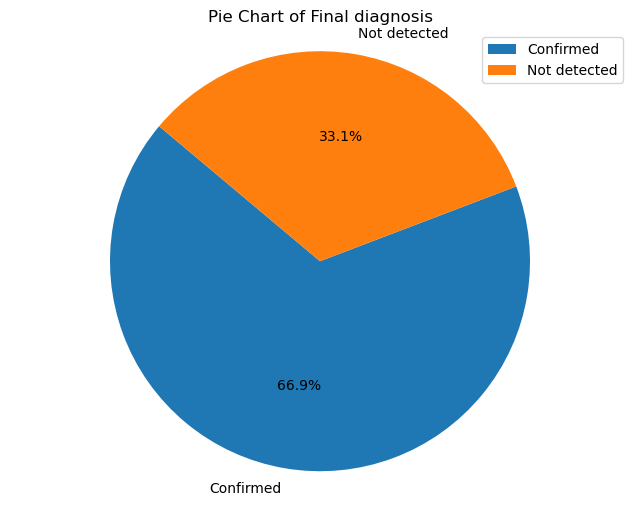

In [36]:
# Pie chart for the dependent variable
counts = train['Final'].value_counts()
counts.index = ['Confirmed', 'Not detected']

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.legend(['Confirmed', 'Not detected'])
plt.title('Pie Chart of Final diagnosis')
plt.axis('equal')  

plt.show()

* Target variable or dependent variable is the Final diagnosis status, which represents whether an individual has or not the "leptospirosis". As this shows it is a binary variable and shows somewhat imbalanceness between the confirmed and not detected classes. Majority (66.9%) of this dataset has confirmed that they have leptospirosis diagnosis

In [37]:
['WPqPCRDiagnosis','UrineqPCRDiagnosis','Month','Sex']

['WPqPCRDiagnosis', 'UrineqPCRDiagnosis', 'Month', 'Sex']

WPqPCRDiagnosis

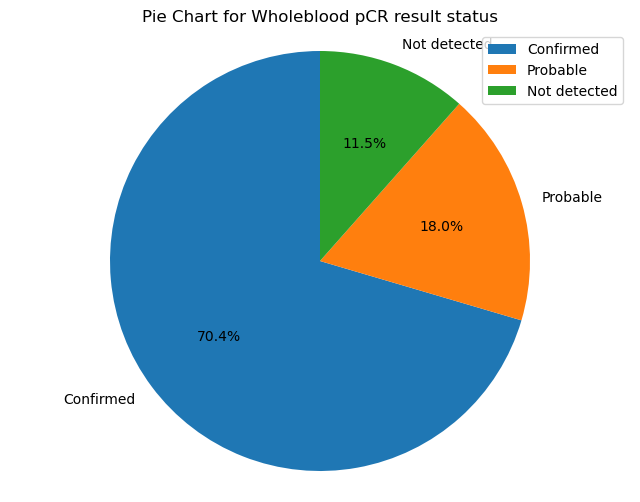

C:\Users\user\AppData\Local\Temp\ipykernel_13744\1215203972.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = train.groupby(['WPqPCRDiagnosis','Final']).size().unstack(fill_value=0)


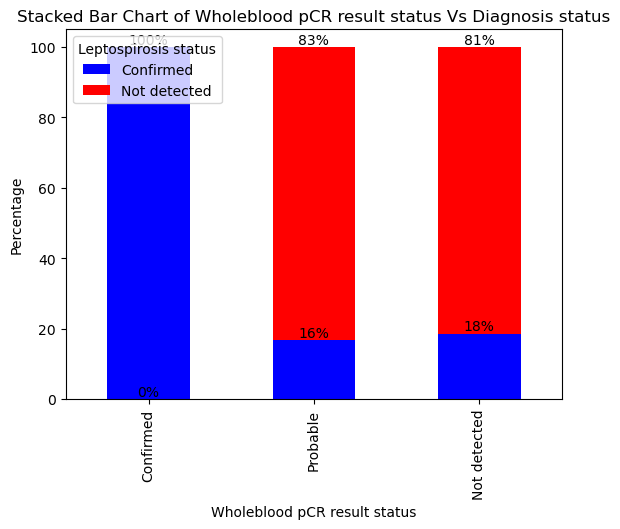

In [38]:
# Pie chart for the dependent variable
counts = train['WPqPCRDiagnosis'].value_counts()
counts.index = ['Confirmed', 'Probable', 'Not detected']

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.legend(['Confirmed', 'Probable', 'Not detected'])
plt.title('Pie Chart for Wholeblood pCR result status')
plt.axis('equal')  

plt.show()
# Plot stacked bar chart
## stacked bar chart
# Group by the two categorical variables and count occurrences
#grouped_df = df1.groupby([X_train['HighBP'],y_train]).size().unstack(fill_value=0)
grouped_df = train.groupby(['WPqPCRDiagnosis','Final']).size().unstack(fill_value=0)
# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['blue', 'red'])

# Add labels and title
plt.xlabel('Wholeblood pCR result status')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Wholeblood pCR result status Vs Diagnosis status')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['Confirmed', 'Probable', 'Not detected'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Confirmed', 'Not detected'],title='Leptospirosis status',loc = "upper left")

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

* According to the stacked barchart above, it is clear that when wholeblood pCR result is confirmed, the the all of those patients are also confirmed as Leptospirosis confirmed. But when the WBpCR status is probable or Not detected, the percentages which the dignosis status is not detected is similar. This indicates that those 2 variables have a meaningful association.

UrineeqPCRDiagnosis

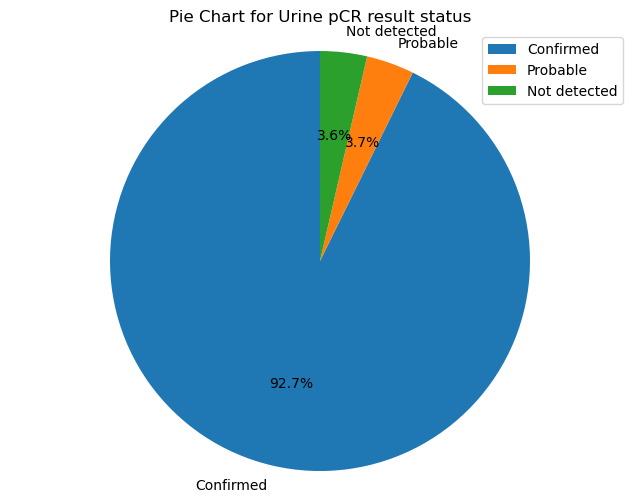

C:\Users\user\AppData\Local\Temp\ipykernel_13744\1306569178.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = train.groupby(['UrineqPCRDiagnosis','Final']).size().unstack(fill_value=0)


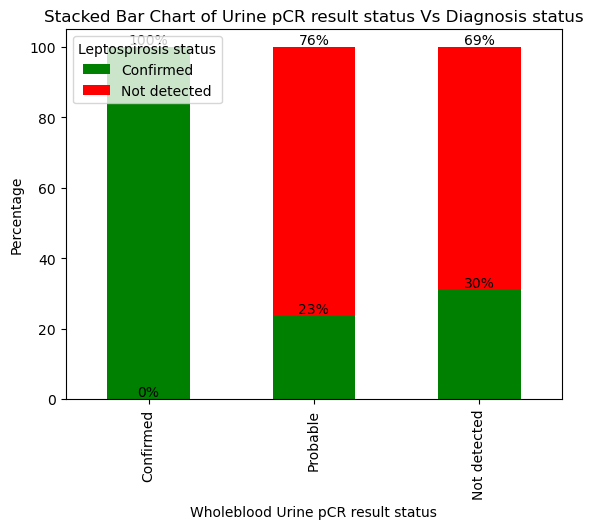

In [39]:
# Pie chart for UrineeqPCRDiagnosis variable
counts = train['UrineqPCRDiagnosis'].value_counts()
counts.index = ['Confirmed', 'Probable', 'Not detected']

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.legend(['Confirmed', 'Probable', 'Not detected'])
plt.title('Pie Chart for Urine pCR result status')
plt.axis('equal')  

plt.show()
# Plot stacked bar chart
## stacked bar chart
grouped_df = train.groupby(['UrineqPCRDiagnosis','Final']).size().unstack(fill_value=0)
# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['green', 'red'])

# Add labels and title
plt.xlabel('Wholeblood Urine pCR result status')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Urine pCR result status Vs Diagnosis status')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['Confirmed', 'Probable', 'Not detected'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Confirmed', 'Not detected'],title='Leptospirosis status',loc = "upper left")

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

* According to the stacked barchart above, it can be identified that when urine pCR result is confirmed, the the all of those patients are also confirmed as Leptospirosis confirmed. But when the UrinepCR result status is probable or Not detected, the percentages which the dignosis status is not detected is roughly similar but in Not detected UrinepCR status has higher percentage. This also indicates that those 2 variables have a meaningful association.

Sex

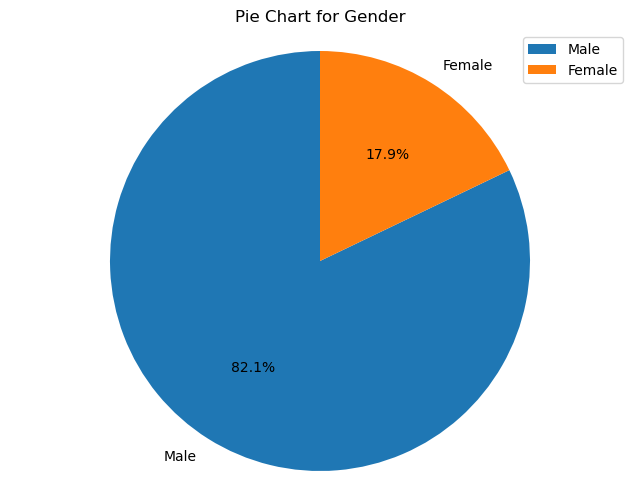

C:\Users\user\AppData\Local\Temp\ipykernel_13744\3292150846.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = train.groupby(['Sex','Final']).size().unstack(fill_value=0)


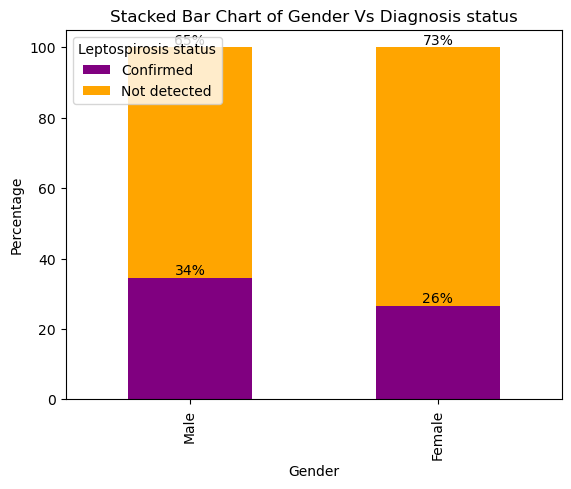

In [40]:
# Pie chart for the Gender variable
counts = train['Sex'].value_counts()
counts.index = ['Male', 'Female']

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.legend(['Male', 'Female'])
plt.title('Pie Chart for Gender')
plt.axis('equal')  

plt.show()
# Plot stacked bar chart
## stacked bar chart
# Group by the two categorical variables and count occurrences
#grouped_df = df1.groupby([X_train['HighBP'],y_train]).size().unstack(fill_value=0)
grouped_df = train.groupby(['Sex','Final']).size().unstack(fill_value=0)
# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['purple', 'orange'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Gender Vs Diagnosis status')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['Male', 'Female'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Confirmed', 'Not detected'],title='Leptospirosis status',loc = "upper left")

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

* As pie chart shows majority(82.1%) of individuals here are Males. According to the stacked barchart above, it can be identified that when Gender is  Male, the percentage of patients also confirmed as Leptospirosis confirmed are higher than the Females. But there is not that much considerable difference in Leptospirosis status based on gender. So, this indicates that those 2 variables have not a considerable relationship.

Sample

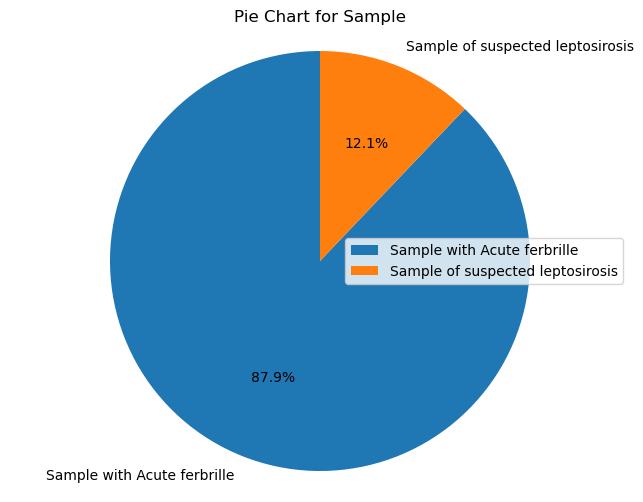

C:\Users\user\AppData\Local\Temp\ipykernel_13744\2533010763.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = train.groupby(['Sample','Final']).size().unstack(fill_value=0)


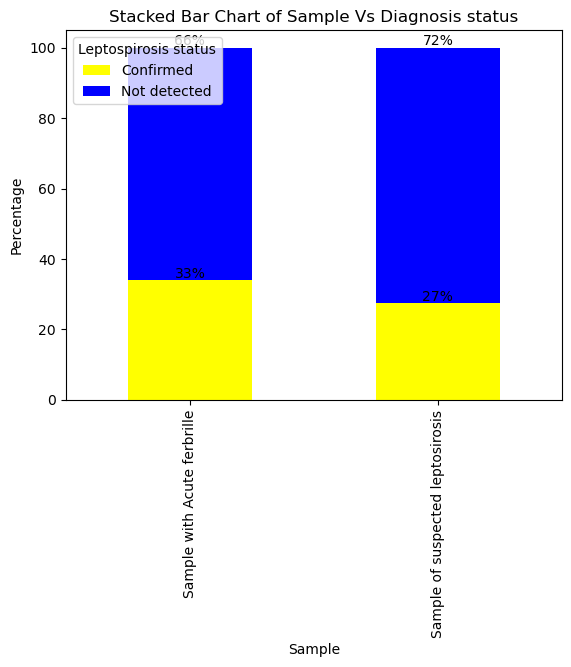

In [41]:
# Pie chart for the Sample variable
counts = train['Sample'].value_counts()
counts.index = ['Sample with Acute ferbrille', 'Sample of suspected leptosirosis']

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.legend(['Sample with Acute ferbrille', 'Sample of suspected leptosirosis'])
plt.title('Pie Chart for Sample')
plt.axis('equal')  

plt.show()
# Plot stacked bar chart
## stacked bar chart
# Group by the two categorical variables and count occurrences
#grouped_df = df1.groupby([X_train['HighBP'],y_train]).size().unstack(fill_value=0)
grouped_df = train.groupby(['Sample','Final']).size().unstack(fill_value=0)
# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['yellow', 'blue'])

# Add labels and title
plt.xlabel('Sample')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Sample Vs Diagnosis status')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['Sample with Acute ferbrille', 'Sample of suspected leptosirosis'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Confirmed', 'Not detected'],title='Leptospirosis status',loc = "upper left")

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

* Majority(87.9%) of individuals here are from the sample with Acute ferbrille illness. According to the stacked barchart above, it can be identified that when the sample is sample with acute ferbile illness, the percentage of patients confirmed as Leptospirosis diagnosis are higher than the other sample. But there is not a considerable difference in Leptospirosis status based on the sample. So, this indicates that those 2 variables have not a considerable relationship.

#### Univariate and bivariate analysis for numerical variables

In [42]:
['Plateletcount','Age','Income','FeverDays']

['Plateletcount', 'Age', 'Income', 'FeverDays']

Age

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


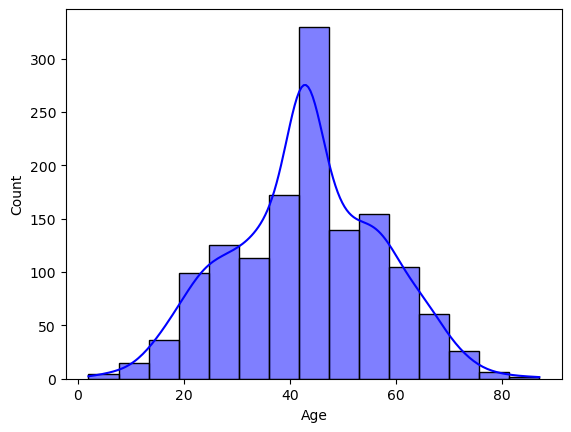

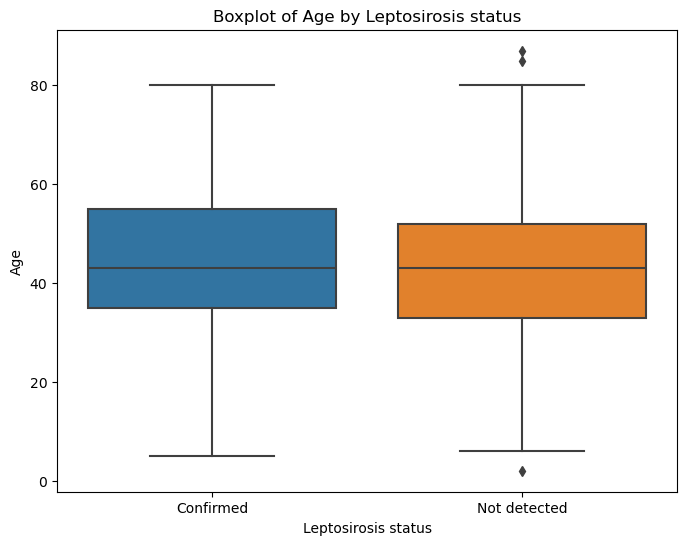

In [43]:
# Histogram for the Age 
sns.histplot(x=train["Age"], bins=15, kde=True, color='blue', edgecolor='black')

## boxplots of Age and Leptisirosis status
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Final', y='Age', data=train)

# Set the tick labels for the x-axis
plt.gca().set_xticklabels(['Confirmed', 'Not detected'])
plt.xlabel('Leptosirosis status')
plt.ylabel('Age')
plt.title('Boxplot of Age by Leptosirosis status')
plt.show()

* Ages of the individuals in this dataset is symmetricly distributed. As the boxplot shows there is not a considerable difference in the ages of the individuals who is diagnosed with Leptisirosis or not. 

Income

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


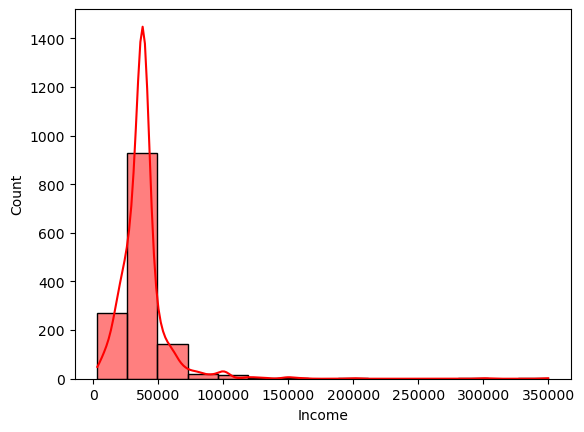

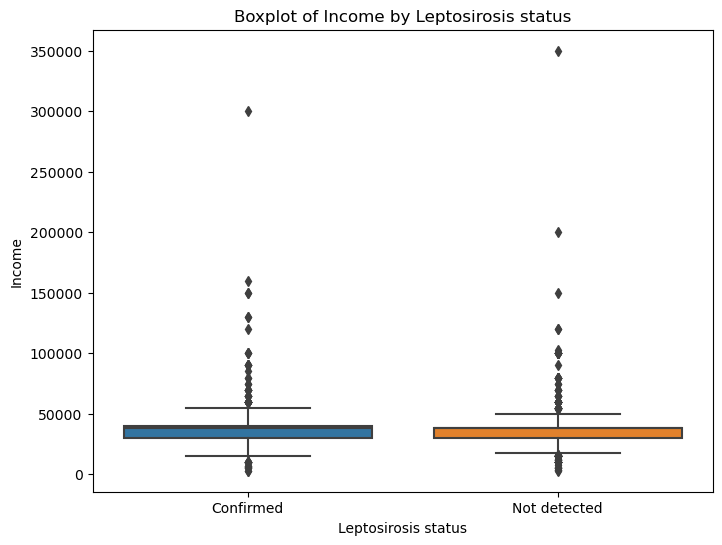

In [44]:
# Histogram for the Income 
sns.histplot(x=train["Income"], bins=15, kde=True, color='red', edgecolor='black')

## boxplots of Age and Leptisirosis status
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Final', y='Income', data=train)

# Set the tick labels for the x-axis
plt.gca().set_xticklabels(['Confirmed', 'Not detected'])
plt.xlabel('Leptosirosis status')
plt.ylabel('Income')
plt.title('Boxplot of Income by Leptosirosis status')
plt.show()

* In this dataset the income variable is highly skewed to the right. When it comes to the boxplots, it also shows that there is no such a difference between leptosirosis statues confirmed and not detected. 

##### Apply log transformation to income variable

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


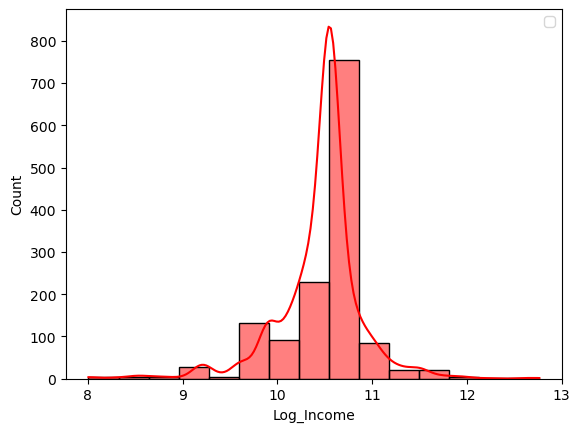

In [45]:
log_data = np.log(train['Income'])

# Plot the original data and the log-transformed data
sns.histplot(x=log_data, bins=15, kde=True, color='red', edgecolor='black')
plt.xlabel('Log_Income')
plt.legend()
plt.show()

FeverDays

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


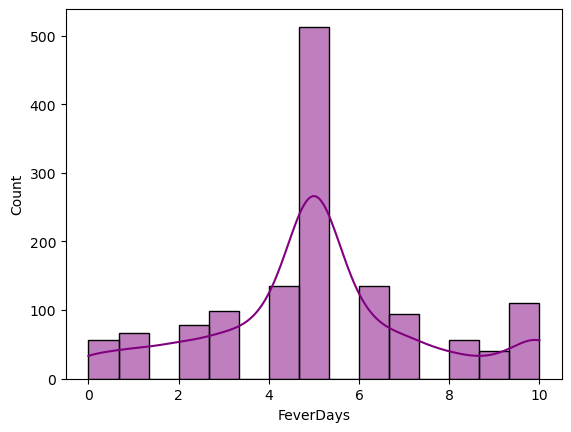

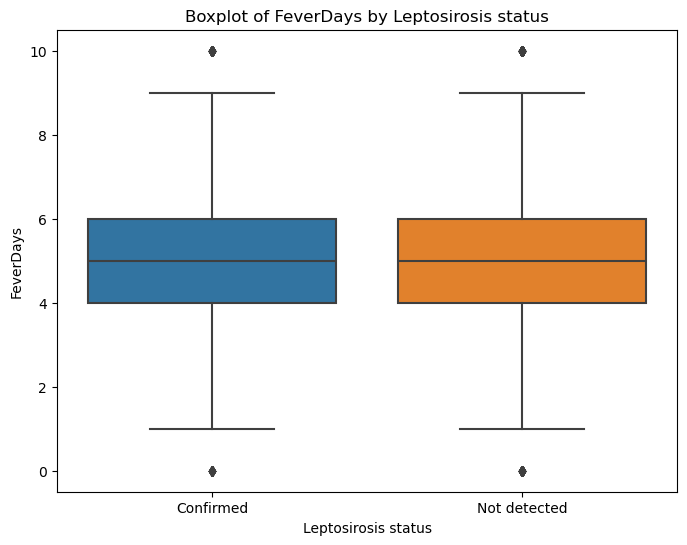

In [46]:
# Histogram for the Fever Days 
sns.histplot(x=train["FeverDays"], bins=15, kde=True, color='purple', edgecolor='black')

## boxplots of Age and Leptisirosis status
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Final', y='FeverDays', data=train)

# Set the tick labels for the x-axis
plt.gca().set_xticklabels(['Confirmed', 'Not detected'])
plt.xlabel('Leptosirosis status')
plt.ylabel('FeverDays')
plt.title('Boxplot of FeverDays by Leptosirosis status')
plt.show()

* The number of days which the individuals have Fever in first 10 days aren't changed according to the Leptosirosis status in a considerable way as this boxplot shows.

#### Check the association between the categorical variables and the binary dependent variable

In [47]:
# Quantitative variables vs dependent variable
from scipy.stats import chi2_contingency
chisq_values = []
insig_vars_categorical = []

# Perform the chisquare test and take the results
for i in categorical_col_EDA:
    # Create a contingency table
    contingency_table = pd.crosstab(train[i], train["Final"])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    alpha = 0.05
    '''if p < alpha:
        print(i,chi2,p, "variables are associated")
    else:
        print(i,chi2,p,"variables are not associated")
    '''
        
    if p >= 0.05:
        insig_vars_categorical.append(i)


* Remove the most insignificant variables those having chisquare values equal to 0, chisquare values which lower indicates the lower the relationship between the corresponding variables. Here 0 is the lowest value get in the chisquare test.

In [48]:
train = train.drop(insig_vars_categorical,axis=1)

#### Check the association between the numerical variables and the binary dependent variables

In [49]:

# Numerical variables vs dependent(binary) variable
from scipy.stats import pointbiserialr
insig_vars_numerical = []
# Calculate the point biserial correlation coefficient
for i in numeric_col_EDA:
    # Perform point-biserial test
    corr, p = pointbiserialr(train[i], train["Final"])
    alpha = 0.05
    '''if p < alpha:
        print(i,corr, p, "variables are associated")
    else:
        print(i,corr, p,"variables are not associated")
    '''
    
    if p >= 0.05:
       insig_vars_numerical.append(i)  

Remove most insignificant numerical variables those have an absolute value of point biserial correlation less than 0.04, as the absolute point biserial correlation closer to the 0 indicates weaker association between the corresponding variables.

In [50]:
train = train.drop(insig_vars_numerical,axis=1)

In [51]:
categorical_col_EDA = train.select_dtypes(include='category').columns.tolist()
numeric_col_EDA = train.select_dtypes(include=['Int64', 'float64','object']).columns.tolist()

In [52]:
train.describe()

,Age,CattleHandle,WBC_first_day,Ncount4,N4,N5,N6,Lcount5,L4,L6,...,SkinrashDays,ProstrationDays,diarrheaDays,AnuriaDays,JaundiceDays,ConfusionDays,ChestpainDays,hepatictenderDays,LymphadenopathyDays,NeckstiffnessDays
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,...,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,42.955629,1.957245,4.247653,5070.783537,67.639877,65.545511,60.686667,1574.795732,22.505793,27.588024,...,0.170151,1.684211,0.681327,0.110310,1.231435,0.186013,0.700793,1.320836,0.281903,1.218457
std,13.926202,0.111498,1.728871,1870.283420,7.611260,8.295669,8.862333,538.699126,6.718995,7.459279,...,1.002106,2.622151,1.872399,0.725799,2.302629,1.022125,2.035902,2.391397,1.367732,2.321057
min,2.000000,1.000000,1.000000,589.000000,5.000000,3.000000,6.000000,60.000000,0.700000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.957245,3.000000,5070.783537,67.639877,65.545511,60.686667,1574.795732,22.505793,27.588024,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.955629,1.957245,4.247653,5070.783537,67.639877,65.545511,60.686667,1574.795732,22.505793,27.588024,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.000000,2.000000,5.000000,5070.783537,67.639877,65.545511,60.686667,1574.795732,22.505793,27.588024,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,87.000000,2.000000,10.000000,37320.000000,96.400000,94.000000,97.000000,7600.000000,96.000000,96.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


##### Correlation Heatmap

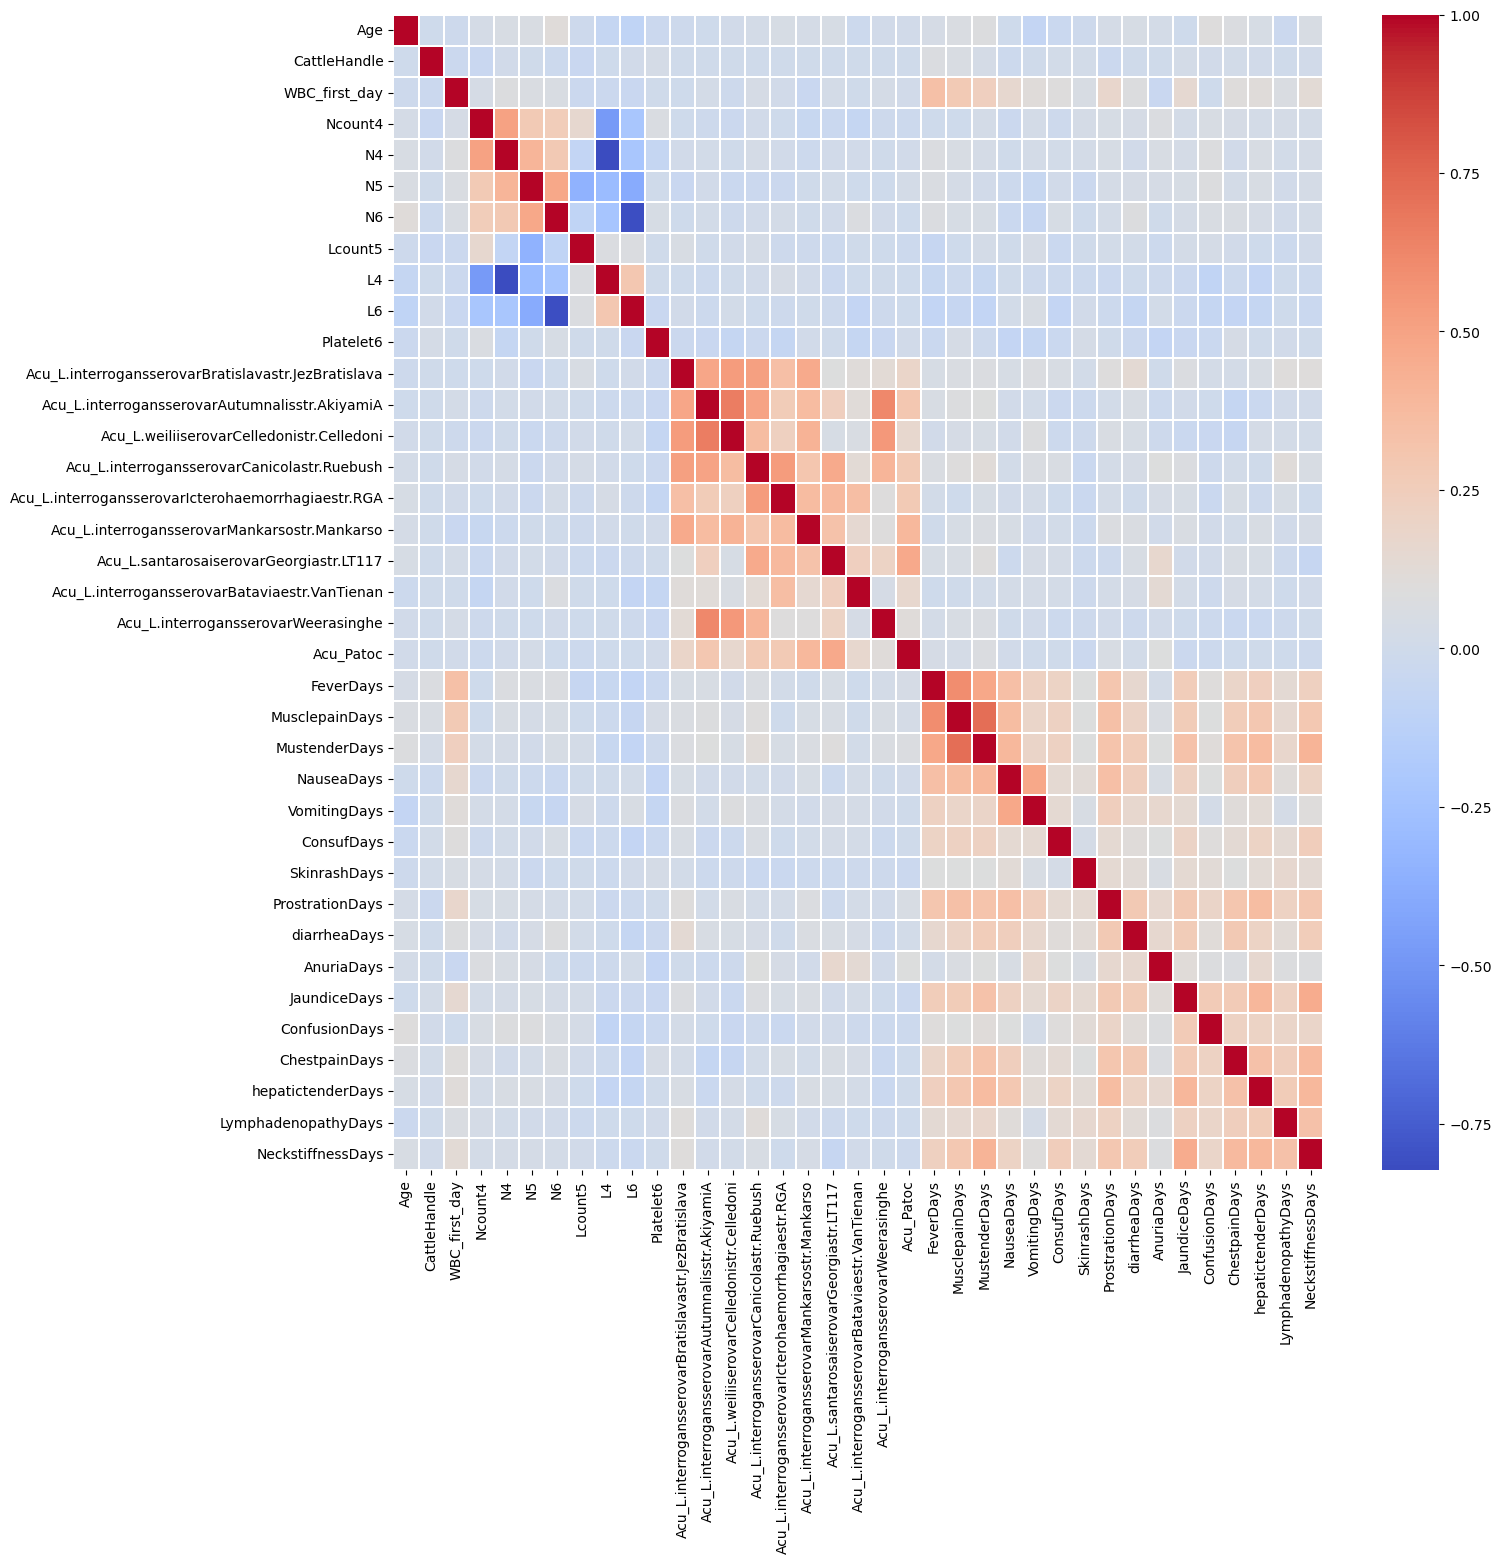

In [53]:
# correlation matrix
correlation_matrix = train.corr(numeric_only=True)

plt.figure(figsize=(15,15 ))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidth=0.15, fmt=".1f")
plt.show()

##### This indicates that betweem most of the pairs of numerical variables have a weaker relationships between them. So, multicollinearity doesn't exist between them. But can see some variables have somewhat higher relationship between them. 
* If we get the variables N4 & L4, N5 & L5 and N6 & L6 variables have a strong negative association between them. So, multicollinearity exist between them. That means when in day 4 "N %-1" results is increasing day 4 "L %-1" results are decreasing or viseversa. Similarly for Day 5 and 6 those investigation findings "N %-1", "L %-1".

* Also, between HeadeacheDays & FeverDays, MusclepainDays & MustenderDays have kind of strong positive association between them. That means when the number of days having fever is increasing the number of days having headache is also increasing or viceversa. Similar kind of behaviour has between the number of days having muscle pain and the number of days having muscle tenderness.

# Question (b)

### Logistic regression model fitting

In [54]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

##### Here the numerical variables have scaled by using standardizing and the categorical variables were encoded using one hot encoding

In [55]:
x = train.drop("Final",axis=1)
y = train["Final"]

categorical_col = x.select_dtypes(include='category').columns.tolist()
numeric_col = x.select_dtypes(include=['Int64', 'float64','object']).columns.tolist()

# Create a ColumnTransformer to do scaling and encoding once for different type of variables
transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_col),  # Apply StandardScaler to 'numerical' column
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_col), # Apply OneHotEncoder to 'categorical' column
    ],
    remainder='passthrough'  # Include remaining columns as-is
)

# Train the Logistic Regression model
model = Pipeline(steps=[
    ('preprocessor', transformer), 
    ('classifier', LogisticRegression(max_iter=3000))
])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Fit the model
model.fit(x, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'CattleHandle',
                                                   'WBC_first_day', 'Ncount4',
                                                   'N4', 'N5', 'N6', 'Lcount5',
                                                   'L4', 'L6', 'Platelet6',
                                                   'Acu_L.interrogansserovarBratislavastr.JezBratislava',
                                                   'Acu_L.interrogansserovarAutumnalisstr.AkiyamiA',
                                                   'Acu_L.weiliiserovarCelledonistr.Celledo...
                                                  ['Year', 'Month', 'Hospital',
                                                   'OPD', 'Sex', 'Education',
                                                   'Prophylactics',
                                                   'Pastantibiotics',
                                                   'Possibleexposure',
                                                   'Consufonset',
                                                   'Jaundiceonset',
                                                   'Coughonset', 'Nauseaonset',
                                                   'Prostrationonset',
                                                   'WPqPCRDiagnosis',
                                                   'UrineqPCRDiagnosis',
                                                   'CultureqPCRDia',
                                                   'SerumqPCRDiagnosis',
                                                   'Isolate', 'streamwaterAny',
                                                   'handlingdomesniAny',
                                                   'nearAnyagri'])])),
                ('classifier', LogisticRegression(max_iter=3000))])

##### Fit model for the train set and here get the training accuracy

In [56]:
#test = pd.read_csv("E:/Year 4/ST 4035/Assignment 01_Kaggle/test.csv",low_memory=False)
# Evaluate the model
y_pred = model.predict(x)
accuracy = accuracy_score(y, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 93.51%


#### Ridge, Lasso classification models (Logistic regression with Ridge & Lasso)

##### ** Since there observed that between some variables there is a relationship, ridge and lasso models are occupied here

### Lasso

In [57]:
x = train.drop("Final",axis=1)
y = train["Final"]

categorical_col = x.select_dtypes(include='category').columns.tolist()
numeric_col = x.select_dtypes(include=['Int64', 'float64','object']).columns.tolist()

# Need to scale the numerical variables and encode the categorical variables before applying ridge or lasso

# Create a ColumnTransformer to do scaling and encoding once for different type of variables
transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_col),  # Apply StandardScaler to 'numerical' column
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_col), # Apply OneHotEncoder to 'categorical' column
    ],
    remainder='passthrough'  # Include remaining columns as-is
)

model_lasso = Pipeline(steps=[
    ('preprocessor', transformer), 
    ('classifier', LogisticRegression(penalty="l1",solver="liblinear",max_iter=3000))
])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Fit the model
model_lasso.fit(x, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'CattleHandle',
                                                   'WBC_first_day', 'Ncount4',
                                                   'N4', 'N5', 'N6', 'Lcount5',
                                                   'L4', 'L6', 'Platelet6',
                                                   'Acu_L.interrogansserovarBratislavastr.JezBratislava',
                                                   'Acu_L.interrogansserovarAutumnalisstr.AkiyamiA',
                                                   'Acu_L.weiliiserovarCelledonistr.Celledo...
                                                   'Prophylactics',
                                                   'Pastantibiotics',
                                                   'Possibleexposure',
                                                   'Consufonset',
                                                   'Jaundiceonset',
                                                   'Coughonset', 'Nauseaonset',
                                                   'Prostrationonset',
                                                   'WPqPCRDiagnosis',
                                                   'UrineqPCRDiagnosis',
                                                   'CultureqPCRDia',
                                                   'SerumqPCRDiagnosis',
                                                   'Isolate', 'streamwaterAny',
                                                   'handlingdomesniAny',
                                                   'nearAnyagri'])])),
                ('classifier',
                 LogisticRegression(max_iter=3000, penalty='l1',
                                    solver='liblinear'))])

In [58]:
# Evaluate the model
y_pred_lasso = model_lasso.predict(x)
accuracy_lasso = accuracy_score(y, y_pred_lasso)
print("Accuracy: {:.2f}%".format(accuracy_lasso * 100))

Accuracy: 93.66%


#### Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [60]:
model_DecisionTree = Pipeline(steps=[
    ('preprocessor', transformer),
    ('dtreeCLF', DecisionTreeClassifier(random_state=100))]) 

param_grid = {
    'dtreeCLF__max_depth': [None, 10, 20, 30,50],
    'dtreeCLF__min_samples_split': [2, 5, 10],
    'dtreeCLF__min_samples_leaf': [1, 2, 4],
    'dtreeCLF__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(model_DecisionTree, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x,y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'CattleHandle',
                                                                          'WBC_first_day',
                                                                          'Ncount4',
                                                                          'N4',
                                                                          'N5',
                                                                          'N6',
                                                                          'Lcount5',
                                                                          'L4',
                                                                          'L6',
                                                                          'Platelet6',
                                                                          'Acu_L.interrogansserovarBratislavastr.JezBratislava',
                                                                          'Acu_L.interrogansserovarAutumnalisstr.AkiyamiA',
                                                                          'Acu_L.weili...
                                                                          'CultureqPCRDia',
                                                                          'SerumqPCRDiagnosis',
                                                                          'Isolate',
                                                                          'streamwaterAny',
                                                                          'handlingdomesniAny',
                                                                          'nearAnyagri'])])),
                                       ('dtreeCLF',
                                        DecisionTreeClassifier(random_state=100))]),
             n_jobs=-1,
             param_grid={'dtreeCLF__criterion': ['gini', 'entropy'],
                         'dtreeCLF__max_depth': [None, 10, 20, 30, 50],
                         'dtreeCLF__min_samples_leaf': [1, 2, 4],
                         'dtreeCLF__min_samples_split': [2, 5, 10]},
             verbose=2)

In [61]:
# The best parameters found by parameter tuning using Grid Search
best_model_DT = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')
y_pred_DT = best_model_DT.predict(x)
accuracy_DT = accuracy_score(y_pred_DT,y)
print("Accuracy: {:.2f}%".format(accuracy_DT * 100))

Best Parameters: {'dtreeCLF__criterion': 'gini', 'dtreeCLF__max_depth': 10, 'dtreeCLF__min_samples_leaf': 1, 'dtreeCLF__min_samples_split': 2}
Accuracy: 94.74%


#### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
x = train.drop("Final",axis=1)
y = train["Final"]

categorical_col = x.select_dtypes(include='category').columns.tolist()
numeric_col = x.select_dtypes(include=['Int64', 'float64','object']).columns.tolist()

# Need to scale the numerical variables and encode the categorical variables before applying rf 
transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_col),  # Apply StandardScaler to 'numerical' column
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_col), # Apply OneHotEncoder to 'categorical' column
    ],
    remainder='passthrough'  # Include remaining columns as-is
)

rf_model = Pipeline(steps=[
    ('preprocessor', transformer),
    ('rf',RandomForestClassifier(random_state=100))]) 

param_grid_rf = {
    'rf__n_estimators': [50, 100, 250,300],
    'rf__max_depth': [None, 10, 20, 30,40],
    'rf__min_samples_split': [2,3,10],
    'rf__min_samples_leaf': [1, 2, 4]
}
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

rf_gridsearch = GridSearchCV(rf_model, param_grid_rf,cv=5, n_jobs=-1, verbose=2)
rf_gridsearch.fit(x,y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\user\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'CattleHandle',
                                                                          'WBC_first_day',
                                                                          'Ncount4',
                                                                          'N4',
                                                                          'N5',
                                                                          'N6',
                                                                          'Lcount5',
                                                                          'L4',
                                                                          'L6',
                                                                          'Platelet6',
                                                                          'Acu_L.interrogansserovarBratislavastr.JezBratislava',
                                                                          'Acu_L.interrogansserovarAutumnalisstr.AkiyamiA',
                                                                          'Acu_L.weili...
                                                                          'WPqPCRDiagnosis',
                                                                          'UrineqPCRDiagnosis',
                                                                          'CultureqPCRDia',
                                                                          'SerumqPCRDiagnosis',
                                                                          'Isolate',
                                                                          'streamwaterAny',
                                                                          'handlingdomesniAny',
                                                                          'nearAnyagri'])])),
                                       ('rf',
                                        RandomForestClassifier(random_state=100))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20, 30, 40],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 3, 10],
                         'rf__n_estimators': [50, 100, 250, 300]},
             verbose=2)

In [64]:
# The best parameters found by parameter tuning using Grid Search
best_model_rf = rf_gridsearch.best_estimator_
print(f'Best Parameters: {rf_gridsearch.best_estimator_}')
y_pred_rf = best_model_rf.predict(x)
accuracy_rf = accuracy_score(y_pred_rf,y)
print("Accuracy: {:.2f}%".format(accuracy_rf * 100))

Best Parameters: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'CattleHandle',
                                                   'WBC_first_day', 'Ncount4',
                                                   'N4', 'N5', 'N6', 'Lcount5',
                                                   'L4', 'L6', 'Platelet6',
                                                   'Acu_L.interrogansserovarBratislavastr.JezBratislava',
                                                   'Acu_L.interrogansserovarAutumnalisstr.AkiyamiA',
                                                   'Acu_L.weiliiserovarCelledonistr.Celledo...
                                                   'Pastantibiotics',
                                                   'Possibleexposure',
                                                   'Consufonset

#### SVM

In [65]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA


In [66]:
# Need to scale the numerical variables and encode the categorical variables before applying rf 
transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_col),  # Apply StandardScaler to 'numerical' column
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_col), # Apply OneHotEncoder to 'categorical' column
    ],
    remainder='passthrough'  # Include remaining columns as-is
)

svm_model = Pipeline(steps=[
    ('preprocessor', transformer),
    ('svm',SVC(C=10,kernel='rbf')),
    ]) 

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

svm_model.fit(x,y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'CattleHandle',
                                                   'WBC_first_day', 'Ncount4',
                                                   'N4', 'N5', 'N6', 'Lcount5',
                                                   'L4', 'L6', 'Platelet6',
                                                   'Acu_L.interrogansserovarBratislavastr.JezBratislava',
                                                   'Acu_L.interrogansserovarAutumnalisstr.AkiyamiA',
                                                   'Acu_L.weiliiserovarCelledonistr.Celledo...
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Year', 'Month', 'Hospital',
                                                   'OPD', 'Sex', 'Education',
                                                   'Prophylactics',
                                                   'Pastantibiotics',
                                                   'Possibleexposure',
                                                   'Consufonset',
                                                   'Jaundiceonset',
                                                   'Coughonset', 'Nauseaonset',
                                                   'Prostrationonset',
                                                   'WPqPCRDiagnosis',
                                                   'UrineqPCRDiagnosis',
                                                   'CultureqPCRDia',
                                                   'SerumqPCRDiagnosis',
                                                   'Isolate', 'streamwaterAny',
                                                   'handlingdomesniAny',
                                                   'nearAnyagri'])])),
                ('svm', SVC(C=10))])

In [67]:
y_pred_svm = svm_model.predict(x)
accuracy_svm = accuracy_score(y_pred_svm,y)
print("Accuracy: {:.2f}%".format(accuracy_svm * 100))

Accuracy: 98.05%


#### Xgboost

In [68]:
from xgboost import XGBClassifier

In [69]:
x = train.drop("Final",axis=1)
y = train["Final"]

categorical_col = x.select_dtypes(include='category').columns.tolist()
numeric_col = x.select_dtypes(include=['Int64', 'float64','object']).columns.tolist()

# Need to scale the numerical variables and encode the categorical variables before applying rf 
transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_col),  # Apply StandardScaler to 'numerical' column
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_col), # Apply OneHotEncoder to 'categorical' column
    ],
    remainder='passthrough'  # Include remaining columns as-is
)

xgb_model = Pipeline(steps=[
    ('preprocessor', transformer),
    ('xgb', XGBClassifier(random_state=100))])
 
xgb_param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.7, 0.8, 0.9],
    'xgb__colsample_bytree': [0.7, 0.8, 0.9]
}

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid,cv=5, n_jobs=-1, verbose=2)
xgb_grid_search.fit(x,y)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'CattleHandle',
                                                                          'WBC_first_day',
                                                                          'Ncount4',
                                                                          'N4',
                                                                          'N5',
                                                                          'N6',
                                                                          'Lcount5',
                                                                          'L4',
                                                                          'L6',
                                                                          'Platelet6',
                                                                          'Acu_L.interrogansserovarBratislavastr.JezBratislava',
                                                                          'Acu_L.interrogansserovarAutumnalisstr.AkiyamiA',
                                                                          'Acu_L.weili...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=100, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.7, 0.8, 0.9],
                         'xgb__learning_rate': [0.01, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 200],
                         'xgb__subsample': [0.7, 0.8, 0.9]},
             verbose=2)

In [70]:
# The best parameters found by parameter tuning using Grid Search
best_model_xgb = xgb_grid_search.best_estimator_
print(f'Best Parameters: {xgb_grid_search.best_estimator_}')
y_pred_xgb = best_model_xgb.predict(x)
accuracy_xgb = accuracy_score(y_pred_xgb,y)
print("Accuracy: {:.2f}%".format(accuracy_xgb * 100))

Best Parameters: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'CattleHandle',
                                                   'WBC_first_day', 'Ncount4',
                                                   'N4', 'N5', 'N6', 'Lcount5',
                                                   'L4', 'L6', 'Platelet6',
                                                   'Acu_L.interrogansserovarBratislavastr.JezBratislava',
                                                   'Acu_L.interrogansserovarAutumnalisstr.AkiyamiA',
                                                   'Acu_L.weiliiserovarCelledonistr.Celledo...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_

#### Since the response variable is imbalanced, SMOTE is applying here to achieve more accuracy

In [71]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 59 columns):
 #   Column                                               Non-Null Count  Dtype   
---  ------                                               --------------  -----   
 0   Year                                                 1387 non-null   category
 1   Month                                                1387 non-null   category
 2   Hospital                                             1387 non-null   category
 3   OPD                                                  1387 non-null   category
 4   Sex                                                  1387 non-null   category
 5   Age                                                  1387 non-null   float64 
 6   Education                                            1387 non-null   category
 7   Prophylactics                                        1387 non-null   category
 8   Pastantibiotics                                      1387 

In [72]:
!pip show scikit-learn
!pip show imbalanced-learn


Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

In [73]:
!pip install --upgrade scikit-learn imbalanced-learn

In [74]:
!pip uninstall scikit-learn
!pip install scikit-learn

^C


In [113]:
from imblearn.over_sampling import SMOTE
smote= SMOTE()

In [114]:
x_resamp, y_resamp =smote.fit_resample(x, y)

In [115]:
y_resamp = label_encoder.fit_transform(y_resamp)

#### Fit the models again after balancing the response variable

#### Lasso

In [116]:
# Fit the models
model_lasso.fit(x_resamp, y_resamp)

# Evaluate the model
y_pred_lasso_re= model_lasso.predict(x_resamp)
accuracy_lasso_re = accuracy_score(y_resamp, y_pred_lasso_re)
print("Accuracy: {:.2f}%".format(accuracy_lasso_re * 100))

Accuracy: 95.04%


#### Decision Tree

In [117]:
# Fit the models
dt = best_model_DT.fit(x_resamp, y_resamp)

# Evaluate the model
y_pred_DT_re=dt.predict(x_resamp)
accuracy_DT_re = accuracy_score(y_resamp, y_pred_DT_re)
print("Accuracy: {:.2f}%".format(accuracy_DT_re * 100))

Accuracy: 95.85%


#### Random Forest

In [118]:
rf = best_model_rf.fit(x_resamp, y_resamp)

In [119]:
y_pred_rf_re = rf.predict(x_resamp)
accuracy_rf_re = accuracy_score(y_pred_rf_re,y_resamp)
print("Accuracy: {:.2f}%".format(accuracy_rf_re * 100))

Accuracy: 96.01%


#### SVM

In [120]:
svm = svm_model.fit(x_resamp, y_resamp)
y_pred_svm_re = svm_model.predict(x_resamp)
accuracy_svm_re = accuracy_score(y_pred_svm_re,y_resamp)
print("Accuracy: {:.2f}%".format(accuracy_svm_re * 100))

Accuracy: 98.38%


#### Xgboost

In [121]:
xgb = best_model_xgb.fit(x_resamp, y_resamp)
y_pred_xgb_re = xgb.predict(x_resamp)
accuracy_xgb_re = accuracy_score(y_pred_xgb_re,y_resamp)
print("Accuracy: {:.2f}%".format(accuracy_xgb_re * 100))

Accuracy: 94.99%


# Question (c)

### Make Predictions for TEST set

In [122]:
test =  pd.read_csv("E:/Year 4/ST 4035/Assignment 01_Kaggle/test.csv",low_memory=False)

In [123]:
test.shape

(347, 805)

In [124]:
# Preprocessing part that did for the train set
[rows,col] = test.shape
print(f"Rows : {rows} \nColumns : {col}")

test = test.drop("ID",axis=1)

Rows : 347 
Columns : 805


In [125]:
test.replace(['99', 99], np.nan, inplace=True)
test.isnull().sum()

Year                                             0
Month                                            0
Hospital                                         0
Sample                                           0
ICU                                             19
                                              ... 
FU_L.interrogansserovarAlexistr.616            317
FU_L.interrogansserovarAustralisstr.Ballico    317
FU_L.interrogansserovarwolfiistr.3705          317
FU_L.interrogansserovarWeerasinghe             317
FU_Patoc                                       317
Length: 804, dtype: int64

In [126]:
test.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
342    False
343    False
344    False
345    False
346    False
Length: 347, dtype: bool

In [127]:
# Changing some column names to proceed
col_names = {'Muscletendernessonset': 'Mustenderonset', 'Muscletendernessad':'Mustenderad', 'Vomitingadmission':'Vomitingad','Cnsuffusionad':'Consufad','Cnsuffusiononset':'Consufonset', 
             'Mucosalrashonset':'Mucorashonset','Mucosalrashad':'Mucorashad', 'Diarrhoeaonset':'diarrheaonset','Diarrhoeaad':'diarrheaad', 'OliguriaAd':'Oliguriaad', 'Haemoptasisonset':'Haemoptysisonset',
             'Haemoptasisad':'Haemoptysisad', "SOBadd": 'SOBad','Hepatictendernessad':'hepatictenderad', 'Hepatomegalyad':'hepatomegalyad',
             'Spleenimegalyad':'Spleenomegalyad','SBPadd':'SBPad','DBPadd':'DBPad', 'Lympadenopathyad':'Lymphadenopathyad','PRad':'Pulseratead'}
test.rename(columns = col_names, inplace=True)


In [128]:
# Creating some new features for the clinical features given as datewise to make counts as same as in the training set
sympt = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash','Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice',
        'Photophobia','Confusion','Cough','Haemoptysis','SOB','SBP','DBP','Pulserate','Chestpain','Bleeding','hepatictender','hepatomegaly','Spleenomegaly','Lymphadenopathy', 'Neckstiffness']
len(sympt)

for col in sympt:
  df = test[[col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  test[col+'Days'] = df['Days']
  test.drop([col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [129]:
#combine stream and stagnant watersources columns seperately
cols_stream = ['HomeStreamrivercanaloranyotherrunningwatersource', 
        'WorkplaceStreamrivercanaloranyotherrunningwatersource']

cols_stagnant =['Homepondlaketankoranyotherstagnantwatersource',
        'WorkPlacepondlaketankoranyotherstagnantwatersource']
       
streamwaterAny = test[cols_stream]
stagnantwaterAny = test[cols_stagnant]

def recode(row):
    if row.isnull().all():
        return np.nan
    elif (row == 1).any():
        return 1
    else:
        return 2

test['streamwaterAny'] = streamwaterAny.apply(recode, axis=1)
test.drop(cols_stream, axis = 1, inplace = True)

test['stagnantwaterAny'] = stagnantwaterAny.apply(recode, axis=1)
test.drop(cols_stagnant, axis = 1, inplace = True)

In [130]:
#combine domestic(Dog, Cat) and farm(Buffalo, Goat, Pig) animals handling columns seperately
cols_farm = ['BuffaloHandle', 'Goathandle', 'Pighandle']

cols_domestic =['Cathandle', 'Doghandle']

handlingfarmanimAny = test[cols_farm]
handlingdomesniAny = test[cols_domestic]

def recode(row):
    if row.isnull().all():
        return np.nan
    elif (row == 1).any():
        return 1
    else:
        return 2

test['handlingfarmanimAny'] = handlingfarmanimAny.apply(recode, axis=1)
test.drop(cols_farm, axis = 1, inplace = True)

test['handlingdomesniAny'] = handlingdomesniAny.apply(recode, axis=1)
test.drop(cols_domestic, axis = 1, inplace = True)

In [131]:
#combine nearby Environmental factors, seperately as wet, plants, agricultural, farming and disposal
cols_wet = ['Homemarshywetland','Workplacemarshywet']
cols_plants =['HomeBushes','Workplacebushes','Homeforest','Workplaceforest']
cols_agri = ['Homeworkingpaddyfield','WorkPlaceworkingpaddyfield','Homeabondantpaddyfield','Workplaceabondantpaddyfield','Homeotheragricultural','workplaceotheragricultural']
cols_animfarm = ['Homeanimalfarm','Workplaceanimalfarm']
cols_disposals =  ['Homegarbageaccumilation','Workplacegarbageaccumilation','Homeblockeddrainage','Workplaceblockeddrainage','Homesewer', 'Workplacesewer']

nearAnywetlands = test[cols_wet]
nearAnyplants = test[cols_plants]
nearAnyagri = test[cols_agri]
nearAnyanimfarm = test[cols_animfarm]
nearAnydisposals = test[cols_disposals]
def recode(row):
    if row.isnull().all():
        return np.nan
    elif (row == 1).any():
        return 1
    else:
        return 2
test['nearAnywetlands'] = nearAnywetlands.apply(recode, axis=1)
test.drop(cols_wet, axis = 1, inplace = True)

test['nearAnyplants'] = nearAnyplants.apply(recode, axis=1)
test.drop(cols_plants, axis = 1, inplace = True)

test['nearAnyagri'] = nearAnyagri.apply(recode, axis=1)
test.drop(cols_agri, axis = 1, inplace = True)

test['nearAnyanimfarm'] = nearAnyanimfarm.apply(recode, axis=1)
test.drop(cols_animfarm, axis = 1, inplace = True)

test['nearAnydisposals'] = nearAnydisposals.apply(recode, axis=1)
test.drop(cols_disposals, axis = 1, inplace = True)

In [132]:
test.shape

(347, 505)

In [133]:
# Percntages of missing values in each variable
Missingt = test.isnull().sum()/len(test)*100
print(Missingt)

Year                 0.000000
Month                0.000000
Hospital             0.000000
Sample               0.000000
ICU                  5.475504
                      ...    
nearAnywetlands     74.927954
nearAnyplants       74.927954
nearAnyagri         74.927954
nearAnyanimfarm     74.927954
nearAnydisposals    74.927954
Length: 505, dtype: float64


In [134]:
test.isna().sum()

Year                  0
Month                 0
Hospital              0
Sample                0
ICU                  19
                   ... 
nearAnywetlands     260
nearAnyplants       260
nearAnyagri         260
nearAnyanimfarm     260
nearAnydisposals    260
Length: 505, dtype: int64

In [135]:
test = test.drop(variables,axis=1)

In [136]:
test.shape

(347, 188)

In [137]:
Categorical_vars_test = ['Year','Month','Hospital','Sample','ICU','OPD','Sex',
                    'Ethnicity','Education','TertiaryEducation','Prophylactics',
                    'Pasttreatments','Pastantibiotics','Chronicillness','Possibleexposure',
                    'Usualdrinkingwatersource','Usualbathingwatersource','Sourceofwaterforhousehold','Garbagedisposalprocedure',
                    'Accumilationofrefusal','Availabilityofpublicgarbagecollectionprocedure',
                    'Rathome','RatWorkplace','RatNeighbourhood','Cathome','Catworkplace','CatNeighbourhood','Doghome','DogWorkplace',
                    'DogNeighbourhood','Cattlehome','CattleWorkplace','CattleNeighbourhood','PigHome','PigWorkplace','PigNeighbourhood','GoatHome',
                    'GoatWorkplace','GoatNeighbourhood','Urumeeyahome','Urumeeyaworkplace','UrimeeyaNeighbourhood','OtherrhodentsHome','Marshlandexposure','Wetsoilexposure',
                    'Floodexposure','Forestexposure','BushesExposure','Otheragriexposure','Gardeningexposure','Otheroutdoorworkexposure','Naturalrunningwaterexposure',
                    'Stagnantwaterexposure','Manmaderunningwaterexposure','Drainsexposure','Otherwaterexposure','Paddyfieldexposure','Walkingbarefootoutdoor',
                    'Feveronset','Headacheonset','Musclepainonset',
                    'Consufonset','Jaundiceonset','Skinrashonset','Oliguriaonset','Anuriaonset','SOBonset','Coughonset','Haemoptysisonset',
                    'Chestpainonset','Nauseaonset','Vomitingonset','diarrheaonset','Bleedingonset','Mucorashonset','Prostrationonset','Rigorsonset',
                    'Photophobiaonset','Chillsonset','Mustenderonset','Psychoticsymptomsonset','Confusiononset','Psychoticsymptomsad','WPqPCRDiagnosis','UrineqPCRDiagnosis',
                    'CultureqPCRDia','SerumqPCRDiagnosis','Isolate','MAT_set_1','streamwaterAny', 'stagnantwaterAny', 'handlingfarmanimAny',
                    'handlingdomesniAny','nearAnywetlands','nearAnyplants','nearAnyagri','nearAnyanimfarm','nearAnydisposals']



In [138]:
# Missing value Imputation
from sklearn.impute import SimpleImputer
# For Categorical variables
categorical_imputer = SimpleImputer(strategy='most_frequent')
for colname in Categorical_vars_test:
    test[colname] = categorical_imputer.fit_transform(test[[colname]])

numerical_imputer = SimpleImputer(strategy='mean')
for colname in Numerical_vars:
    test[colname] = numerical_imputer.fit_transform(test[[colname]])

test
test.isnull().sum()

Year                0
Month               0
Hospital            0
Sample              0
ICU                 0
                   ..
nearAnywetlands     0
nearAnyplants       0
nearAnyagri         0
nearAnyanimfarm     0
nearAnydisposals    0
Length: 188, dtype: int64

In [139]:
Numerical_varsDAYS_test = ['HeadacheDays','FeverDays','ChillsDays','RigorsDays','MusclepainDays','MustenderDays','NauseaDays','VomitingDays',
                           'ConsufDays','SkinrashDays','MucorashDays','ProstrationDays','diarrheaDays','OliguriaDays','AnuriaDays','JaundiceDays',
                           'PhotophobiaDays','ConfusionDays','CoughDays','HaemoptysisDays','SOBDays','SBPDays','DBPDays','PulserateDays','ChestpainDays','BleedingDays','hepatictenderDays',
                           'hepatomegalyDays','SpleenomegalyDays','LymphadenopathyDays','NeckstiffnessDays']
test[Categorical_vars_test] = test[Categorical_vars_test].astype('category')
test[Numerical_varsDAYS_test] = test[Numerical_varsDAYS_test].astype('int64')

##### Remove the variables that identified that are not significant in EDA part

In [140]:
test = test.drop(["SBPDays", "DBPDays", "PulserateDays"],axis=1)

In [141]:
test = test.drop(insig_vars_categorical,axis=1)

In [142]:
test = test.drop(insig_vars_numerical,axis=1)

### Predict the dependent variable  

##### For the test data set highest accuracy was obtained by occupying the XGboost model, among the models trained Lasso, Logistic, Random forest, Decision tree and SVM
##### This was checked by the accuracy given by the Kaggle competition. Above I have got only the training accuracies because test set actual values weren't given.
##### So, the best model is the XGboost model

In [143]:
ytest_pred_xgb = xgb.predict(test)

In [144]:
ytest_pred_xgb = ytest_pred_xgb + 1

In [145]:
print(ytest_pred_xgb)

[1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 1 2 2 1 1 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 1
 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2
 2 2 2 2 1 1 1 2 2 2 2 1 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 2 1 2
 2 1 2 2 2 1 1 2 2 2 2 1 1 2 2 1 2 1 1 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 1
 2 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2
 1 2 2 1 2 2 2 2 2 1 2 2 1 2]


#### Store predictions


In [146]:
test_id =  pd.read_csv("E:/Year 4/ST 4035/Assignment 02_Kaggle/test.csv",low_memory=False)["ID"]

In [147]:
predictions = pd.DataFrame({
    'ID': test_id,
    'Final':ytest_pred_xgb
})

In [148]:
predictions.to_csv("E:/Year 4/ST 4035/Assignment 02_Kaggle/sample_submissionxgb%.csv", index=False)